In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')

In [5]:
df.drop('id',axis=1, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [13]:
df = df.replace('B', 0)
df = df.replace('M', 1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
df.drop('Unnamed: 32', axis=1, inplace=True)
df.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [22]:
x = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_split = train_test_split(x,y,test_size=0.3, random_state=0)

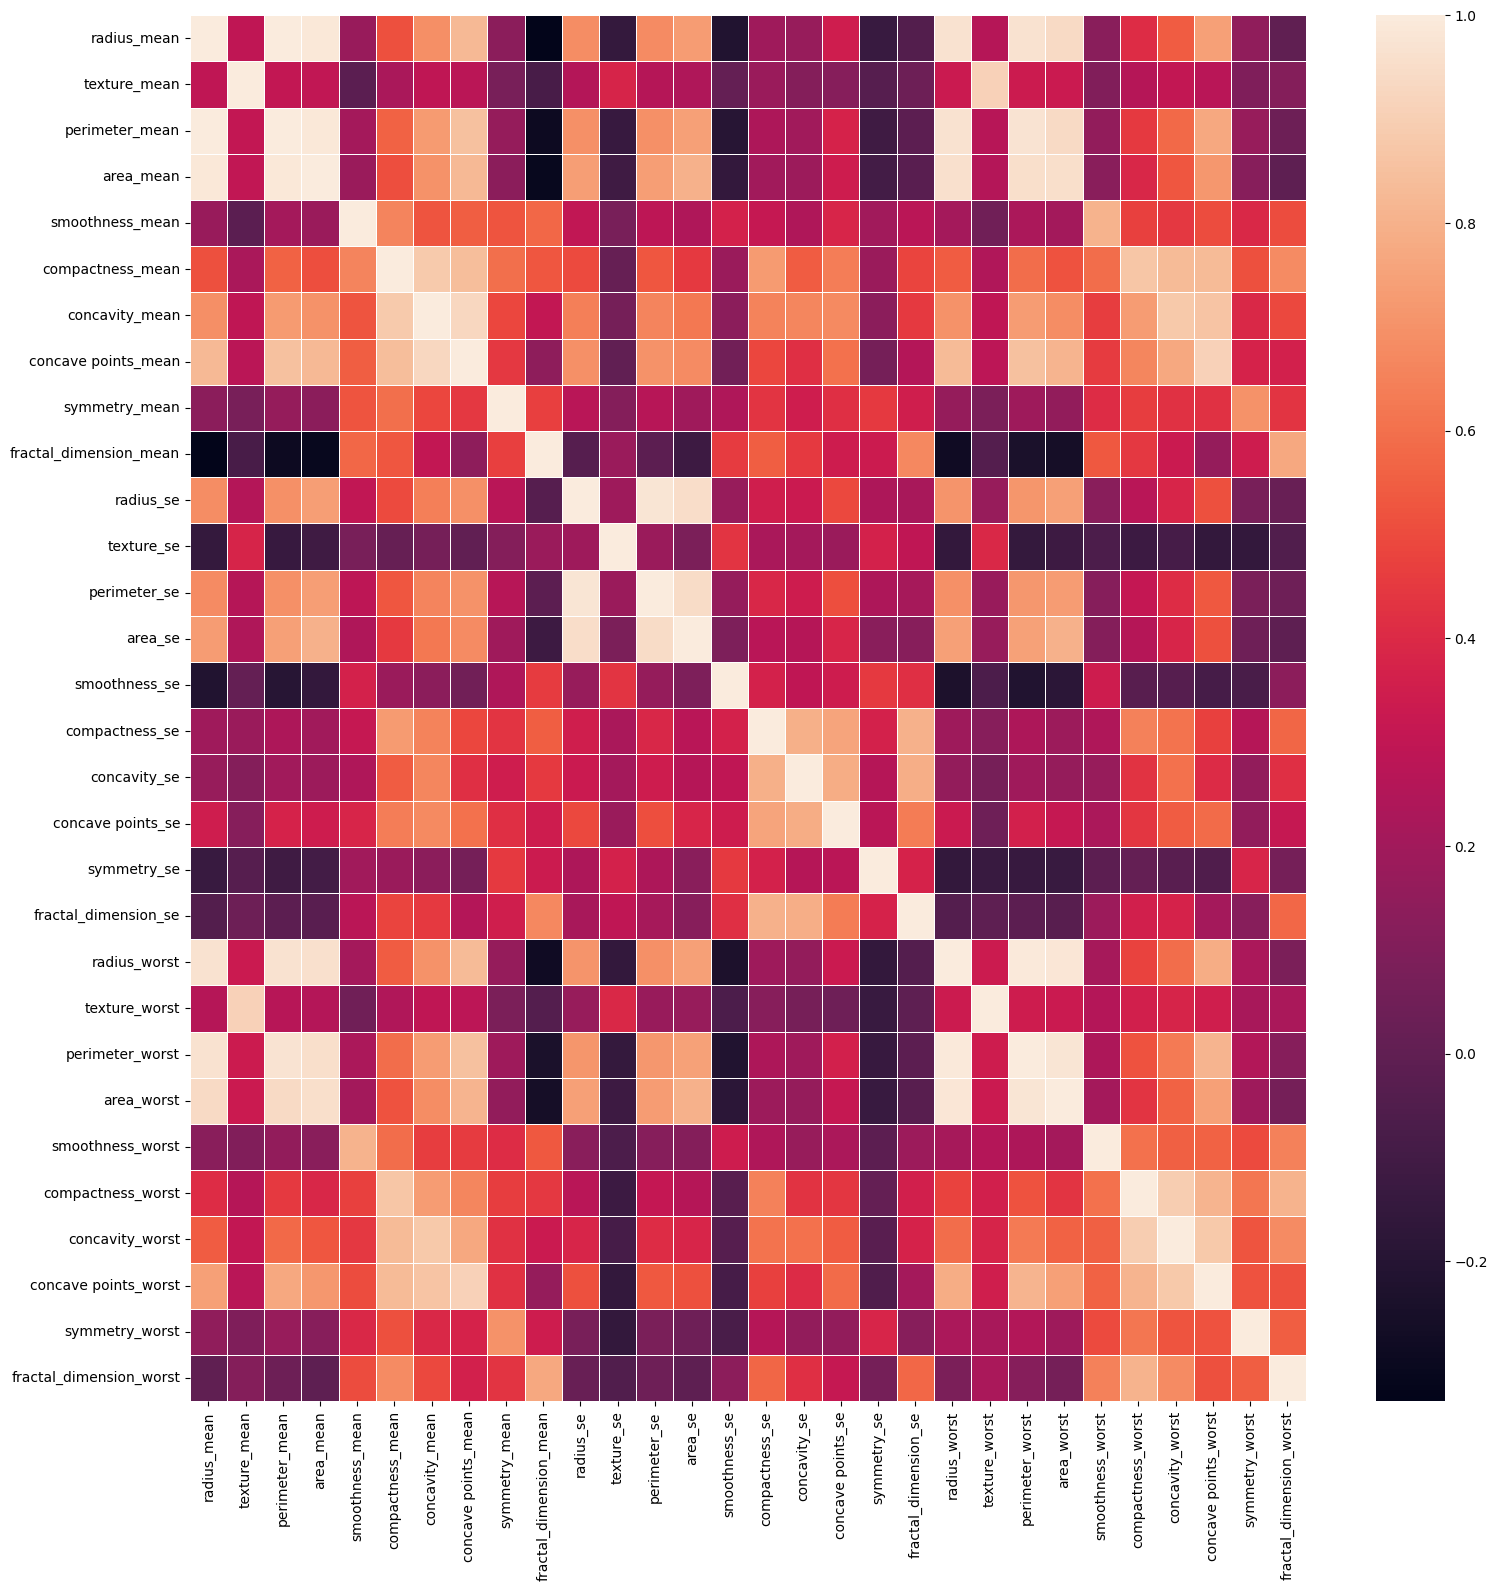

In [24]:
import seaborn as sns
f,ax = plt.subplots(figsize=(18, 18))
corr_mat = sns.heatmap(x_train.corr(), annot=False, linewidths=.5, fmt= '.1f',ax=ax)

Optimal Feature: 15


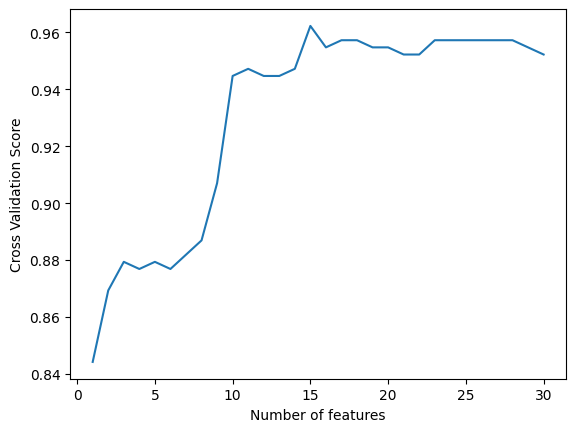

In [39]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

svc = SVC(kernel='linear')
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2), scoring='accuracy')
rfecv.fit(x_train, y_train)
print("Optimal Feature:", rfecv.n_features_)
plt.figure()
plt.xlabel("Number of features")
plt.ylabel("Cross Validation Score")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score'])+1), rfecv.cv_results_['mean_test_score'])
plt.show()

In [40]:
features=  list(x_train.columns[rfecv.support_])
print(features)

['radius_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'texture_se', 'perimeter_se', 'radius_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


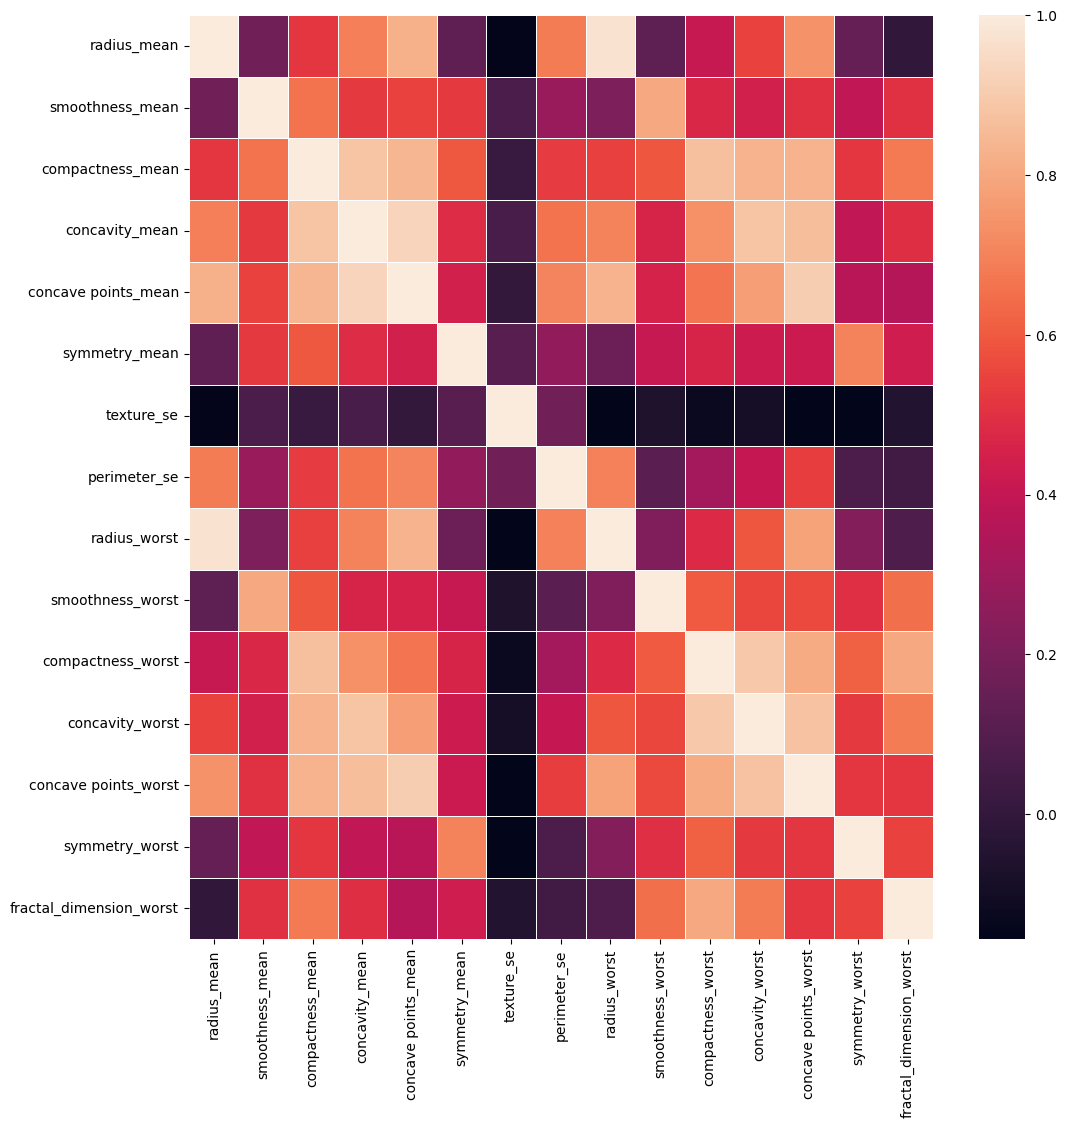

In [42]:
f,ax = plt.subplots(figsize=(12, 12))
corr_mat = sns.heatmap(x_train[features].corr(), annot=False, linewidths=.5, fmt= '.1f',ax=ax)

In [47]:
from sklearn.preprocessing import StandardScaler
x_train = StandardScaler().fit_transform(x_train[features])
x_train

array([[-0.74998027,  0.58459276, -0.42772603, ..., -0.6235968 ,
         0.07754241,  0.45062841],
       [-1.02821446,  0.74288151, -0.73184316, ..., -0.7612376 ,
        -1.07145262, -0.29541379],
       [-0.53852228, -0.714814  , -0.73164695, ..., -0.50470441,
         0.34900827, -0.13371556],
       ...,
       [-1.3214733 ,  0.31837986, -0.87350288, ..., -0.98621857,
        -0.69108476, -0.13148524],
       [-1.24245479, -1.94083234, -1.58219389, ..., -1.7562754 ,
        -1.55125275, -1.01078909],
       [-0.74441558, -0.27808094, -0.03884851, ..., -0.28490593,
        -1.2308599 ,  0.20083251]])

In [48]:
SV = SVC(probability=True, random_state=0)
SV.fit(x_train, y_train)
print(SV.score(x_train, y_train))

0.9698492462311558


In [51]:
x_test = StandardScaler().fit_transform(x_test[features])
x_test

array([[-0.17715788,  1.00752255,  0.73951357, ...,  1.39677786,
         1.14404645,  1.44477141],
       [-0.23403396, -0.56835834, -0.93248219, ..., -0.80720664,
        -0.82315205, -0.90738698],
       [ 0.00843776, -1.1413428 , -0.8662017 , ..., -0.47125285,
        -1.35417496, -0.9500342 ],
       ...,
       [-0.08436006,  0.2129841 ,  0.0361648 , ...,  0.23134793,
        -0.12489141,  0.31899407],
       [-0.20709266, -0.71351441, -0.72658962, ..., -0.86661774,
        -0.49040068, -0.97846568],
       [-1.39460537, -0.25651589, -0.86197104, ..., -1.33005467,
        -0.83866895, -0.57659762]])

In [52]:
y_pred = pd.DataFrame(SV.predict(x_test), columns=['diagnosis'])

In [55]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred, y_split))

0.9590643274853801


In [ ]:
#SVM with Hyperparameter Tuning WIP